<a href="https://colab.research.google.com/github/devanshkasaudhan/ML_projects/blob/main/transfer_learning_with_inceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Youtube video link

https://youtu.be/chQNuV9B-Rw?si=r-gGCHLVBxEWuoqG

## Downloading Kaggle dataset

https://www.kaggle.com/datasets/noulam/tomato

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download noulam/tomato
!unzip -q tomato.zip

100% 742M/743M [00:22<00:00, 36.7MB/s]
100% 743M/743M [00:22<00:00, 35.0MB/s]


In [ ]:
!nvidia-smi


Fri Oct 20 12:40:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Importing Libraries

In [ ]:
from tensorflow.keras.layers import Input,Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE =[224, 224]

train_path ='/content/New Plant Diseases Dataset(Augmented)/train'
valid_path ='/content/New Plant Diseases Dataset(Augmented)/valid'

## creating an instance of the InceptionV3 model

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE+[3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable=False

In [ ]:
folders = glob('/content/New Plant Diseases Dataset(Augmented)/train/*')
folders

['/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold']

In [ ]:
x = Flatten()(inception.output)

## Making Custum Output Layer

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs= inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']

)

## Train and test data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen= ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size= (224,224),
                                                 batch_size=16,
                                                 class_mode='categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/valid',
                                                 target_size= (224,224),
                                                 batch_size=16,
                                                 class_mode='categorical')

Found 4585 images belonging to 10 classes.


## Fitting the model

In [ ]:
r = model.fit_generator(
    training_set,
    validation_data= test_set,
    epochs= 10,
    steps_per_epoch=len(training_set),
    validation_steps = len(test_set)
)

<ipython-input-32-5f88b01ff5e3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
1147/1147 [==============================] - 287s 238ms/step - loss: 4.1352 - accuracy: 0.6806 - val_loss: 2.6948 - val_accuracy: 0.7952
Epoch 2/10
1147/1147 [==============================] - 273s 238ms/step - loss: 3.6229 - accuracy: 0.7827 - val_loss: 2.5814 - val_accuracy: 0.8345
Epoch 3/10
1147/1147 [==============================] - 265s 231ms/step - loss: 3.1569 - accuracy: 0.8228 - val_loss: 3.6086 - val_accuracy: 0.8153
Epoch 4/10
1147/1147 [==============================] - 274s 239ms/step - loss: 3.1452 - accuracy: 0.8382 - val_loss: 4.2433 - val_accuracy: 0.8131
Epoch 5/10
1147/1147 [==============================] - 266s 232ms/step - loss: 2.9496 - accuracy: 0.8540 - val_loss: 5.0710 - val_accuracy: 0.7913
Epoch 6/10
1147/1147 [==============================] - 261s 227ms/step - loss: 2.9322 - accuracy: 0.8664 - val_loss: 3.4801 - val_accuracy: 0.8462
Epoch 7/10
1147/1147 [==============================] - 263s 229ms/step - loss: 2.8333 - accuracy: 0.8718 - val_

In [ ]:
import matplotlib.pyplot as plt

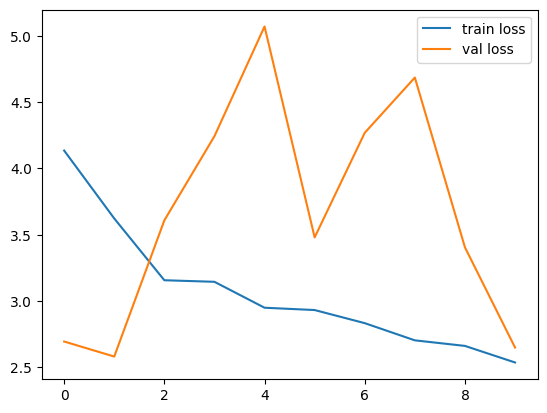

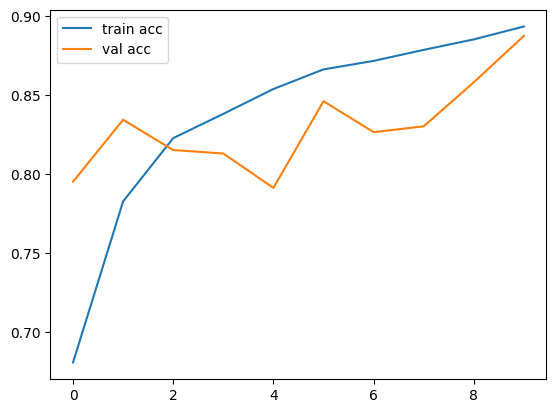

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Define the image path
image_path = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Tomato___Spider_mites Two-spotted_spider_mite/002835d1-c18e-4471-aa6e-8d8c29585e9b___Com.G_SpM_FL 8584.JPG'

# Load the image and resize it to match the input size of your model (224x224 in your case)
img = image.load_img(image_path, target_size=(224, 224))

# Convert the image to a NumPy array and preprocess it
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Rescale pixel values to [0, 1]

# Ensure that you are using the same preprocessing steps as you used during training


In [ ]:
predictions = model.predict(img)


1/1 [==============================] - 0s 27ms/step


In [ ]:
predictions

array([[0.0000000e+00, 4.9681066e-15, 0.0000000e+00, 1.0918321e-21,
        0.0000000e+00, 1.0000000e+00, 9.0572081e-13, 5.4355880e-20,
        2.1986586e-34, 2.3163880e-20]], dtype=float32)

In [ ]:
custom_class_labels = folders

# Assuming "predictions" contains the model's output
top_class_index = predictions.argmax(axis=-1)[0]
predicted_class = custom_class_labels[top_class_index]

print("Predicted Class:", predicted_class)


Predicted Class: /content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
